In [1]:
import time
from IPython import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

# 1) Get data in a pandas.DataFrame and plot it using matplotlib.pyplot

In [6]:
# Get data
#  1) directement sous forme de list python

GPU = [2048,2048,4096,4096,3072,6144,6144,8192,8192,8192,8192,11264,11264]
prix = [139.96,149.95,184.96,194.95,299.95,332.95,359.95,459.95,534.95,569.95,699.95,829.96,929.95]
data = pd.DataFrame({'x1':GPU,'y':prix})

# Remarque: On peut également enregistrer des données structurées (dataFrame) en .csv
data.to_csv('graphicCardsData.csv',index=False)

#  2) En utilisant la fonction .read_csv() de pandas pour importer des données extérieure sous form .csv 
#     directement dans un pandas.DataFrame
data = pd.read_csv('graphicCards.csv')
data.head()

,builder,chipset,frequency (MHz),boostFreq (MHz),overclok,bus,memory (Go),interfaceMem (bits),video memory freq (MHz),memory type,stream procs,direct X (max),multi GPU,consumption (W),price (euros)
0,amd,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,NaN,18.0,37.94
1,asus,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,600.0,GDDR3,160.0,11.0,CrossFireX,19.0,39.95
2,msi,nvidia,954.0,NaN,no,PCI Express 2.0 16x,1.0,64,800.0,DDR3,192.0,12.0,NaN,19.0,39.95
3,sapphire,amd,625.0,NaN,no,PCI Express 2.0 16x,1.0,64,667.0,DDR3,160.0,11.0,NaN,18.0,39.95
4,asus,nvidia,954.0,NaN,no,PCI Express 2.0 16x,1.0,64,800.0,GDDR5,192.0,12.0,NaN,19.0,41.95


In [8]:
data = data[['memory (Go)', 'price (euros)']]

In [14]:
data = data.rename(columns={"memory (Go)": 'x1', 'price (euros)': 'y'})

In [20]:
data['x1'] = data['x1'] * 1000

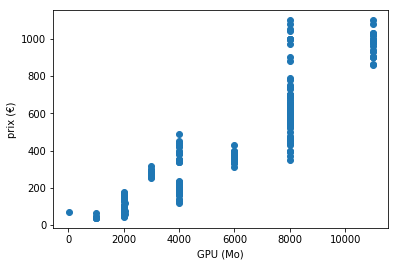

In [21]:
#PLot data

plt.plot(data.x1,data.y,'o')
plt.xlabel('GPU (Mo)')
plt.ylabel('prix (€)')
plt.show();

# 2) Contruire un modéle pour nos données

In [16]:
# Définir notre hypothèse (fonction)

def hypothesis(x,theta):
    return np.dot(x,theta)

In [17]:
# On génére aléatoirement une valeur de départ pour le paramètre theta1 de notre modèle

theta = np.random.rand()

In [23]:
# Fonction pour générer la droite représentant notre modèle

def getHypothesisForPLot(theta):
    return pd.DataFrame({'x':np.arange(0, 12000, 100),
                         'y':[hypothesis(x,theta) for x in np.arange(0, 12000, 100)]})

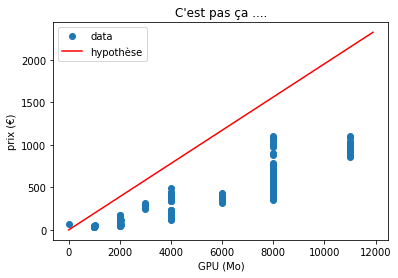

theta = 0.195375


In [24]:
# On plot les données avec notre hypothèse ...

plt.plot(data.x1,data.y,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y ,'r',label='hypothèse')
plt.xlabel('GPU (Mo)')
plt.ylabel('prix (€)')
plt.title("C'est pas ça ....")
plt.legend()
plt.show();

print("theta = %f" % theta)

# 3) Tester la pertinence de notre modèle: la fonction de coût

In [25]:
data.shape

(246, 2)

In [26]:
# On définit notre fonction de coût: somme quadratique (eg: on somme les carré)

def costFunction(y,yhat):
    return np.power(yhat - y,2).sum()*(2/y.shape[0])

In [27]:
# Prix prédis par notre modèle (avec un theta choisi pour illustrer) pour chaque exemple

theta = 0.07
yhat = hypothesis(data.x1,theta)

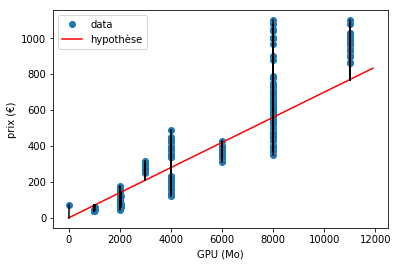

theta = 0.070000
J(theta) = 39928.921165


In [28]:
#Comment fonctionne la fonction de coût: on somme le carré de toute les barre noire

plt.plot(data.x1,data.y,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(data.shape[0]):
    plt.plot((data.x1[i],data.x1[i]), (min(data.y[i],yhat[i]),max(data.y[i],yhat[i])), 'k-')
plt.xlabel('GPU (Mo)')
plt.ylabel('prix (€)')
plt.legend()
plt.show();

print("theta = %f" % theta)
print("J(theta) = %f" % costFunction(data.y,yhat))

# 4) À quoi ressemble J(theta) en fonction de theta1

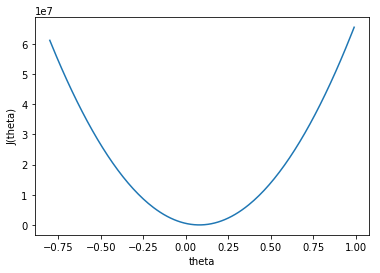

In [30]:
# Calculons (brutalement) la valeur de J(theta) dans un intervale de valeur de theta1 
#     pour observer la forme de notre fonction de coût que nous allons chercher à minimiser

thetaRange = np.arange(-0.8,1,0.01)
costFctEvol = pd.DataFrame({'theta':thetaRange,
                            'cost':[costFunction(data.y,hypothesis(data.x1,theta)) 
                                    for theta in thetaRange]})

plt.plot(costFctEvol.theta,costFctEvol.cost)
plt.xlabel('theta')
plt.ylabel('J(theta)')
plt.show;

# 5) La descente de Gradient

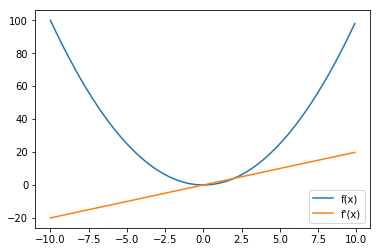

In [31]:
# La descente de gradient utilise la notion de dérivée, 
#      illustrée ici avec la fonction carré (qui doit nous en rappeler une autre!)

def fct(x):
    return np.power(x,2)

def fctDeriv(x):
    return 2*x

fctCarre = pd.DataFrame({'x':np.arange(-10,10,0.1),'y':[fct(x) for x in np.arange(-10,10,0.1)]})
fctCarreD = pd.DataFrame({'x':np.arange(-10,10,0.1),
                          'y':[fctDeriv(x) for x in np.arange(-10,10,0.1)]})
plt.plot(fctCarre.x,fctCarre.y,label='f(x)')
plt.plot(fctCarreD.x,fctCarreD.y,label="f'(x)")
plt.legend();

In [32]:
# La descente de gradient utilise la dérivé de la fonction de coût 
#    par rapport au paramètre theta1

def costFctDeriv(x,y,yhat):
    return ((yhat - y)*x.T).sum().sum()/y.shape[0]

In [33]:
# À chaque étape de la descente de gradient (jusqu'à la convergence), 
#   on incremente la valeur de theta1 par ce résultat.
#   Alpha est le learning rate

def gradDescent(x,y,yhat,alpha):
    return -alpha*costFctDeriv(x,y,yhat)

In [34]:
# on plot les données avec l'hypothèse correpondant à la valeur de theta 
#    ainsi que l'évolution dans la courbe de J(theta) en fonction de theta
# On rajoute également la valeur de J(theta) en fonction du temps qui va nous servir à 
#   débuger notre algorithme

def plotData(ax,data,theta,yhat,gradDescentEvol, title=''):
    ax.plot(data.x1,data.y,'o',label='data')
    ax.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
    for i in range(data.shape[0]):
        ax.plot((data.x1[i],data.x1[i]), (min(data.y[i],yhat[i]),max(data.y[i],yhat[i])), 'k-')
    ax.set_xlabel('iteration step')
    if title != "":
        ax.set_title(title)
    ax.legend()

def plotCostFunction(ax,data,theta,gradDescentEvol,thetaInit, title=''):
    thetaRange = np.arange(-abs(thetaInit)+0.07,abs(thetaInit)+0.07,0.01)
    costFctEvol = pd.DataFrame({'theta':thetaRange,
                                'cost':[costFunction(data.y,hypothesis(data.x1,genTheta))
                                        for genTheta in thetaRange]})

    ax.plot(costFctEvol.theta,costFctEvol.cost,label='J(theta)')
    for i in range(gradDescentEvol.shape[0]):
        ax.plot(gradDescentEvol.theta[i],gradDescentEvol.J[i],'ro')
    for i in range(gradDescentEvol.shape[0]-1):
        ax.plot((gradDescentEvol.theta[i],gradDescentEvol.theta[i+1]),
                (gradDescentEvol.J[i],gradDescentEvol.J[i+1]),'k-',lw=1)
    ax.set_xlabel('iteration step')
    if title != "":
        ax.set_title(title)
    ax.legend()

def plotCostFunctionEvol(ax,gradDescentEvol,title=""):
    ax.plot(np.arange(gradDescentEvol.shape[0]),gradDescentEvol.J,label='J(theta)')
    ax.set_xlabel('iteration step')
    if title != "":
        ax.set_title(title)
    ax.legend()

In [35]:
# On utilise donc une valeur de départ pour theta généré aléatoirement entre 0 et 1, 
#    la valeur du learning rate est fixé à 0.00000003
# Epsilon correspond à la précision que l'on veut atteindre pour stopper la descente de gradient

thetaInit = np.random.rand()
yhat = hypothesis(data.x1,thetaInit)
alpha = 0.003
epsilon = 0.001

In [36]:
# On prepare un dataframe pour stocker les valeurs de J(theta) et theta1

gradDescentEvol = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(data.y,yhat)},index = np.arange(1))

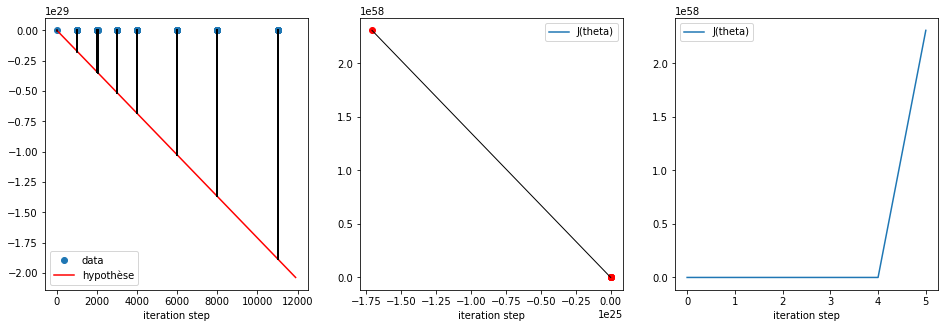

KeyboardInterrupt: 

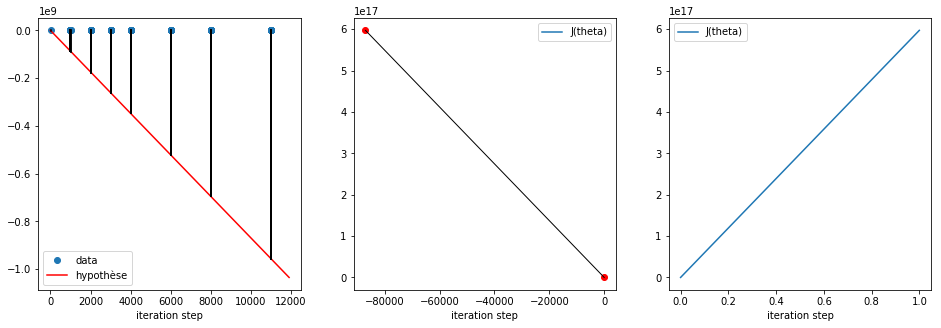

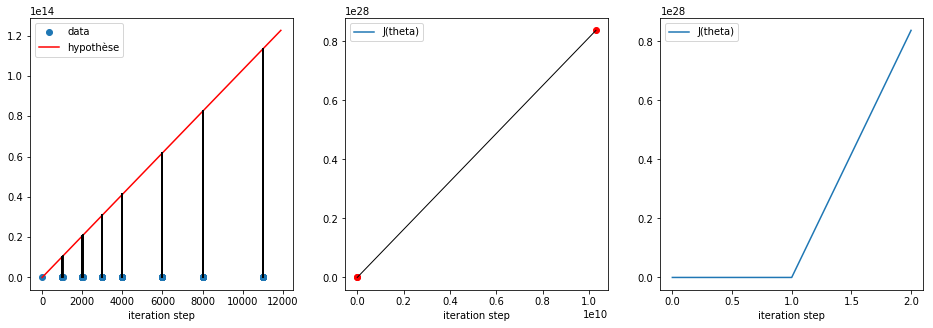

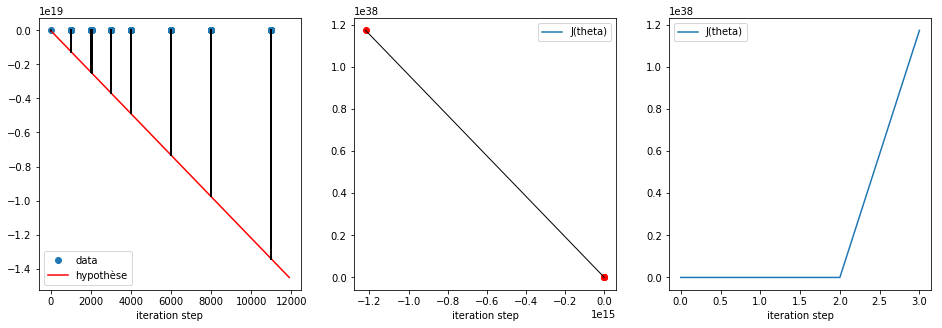

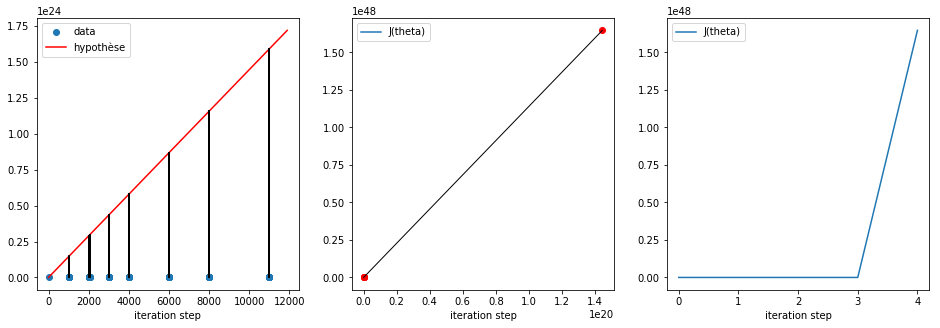

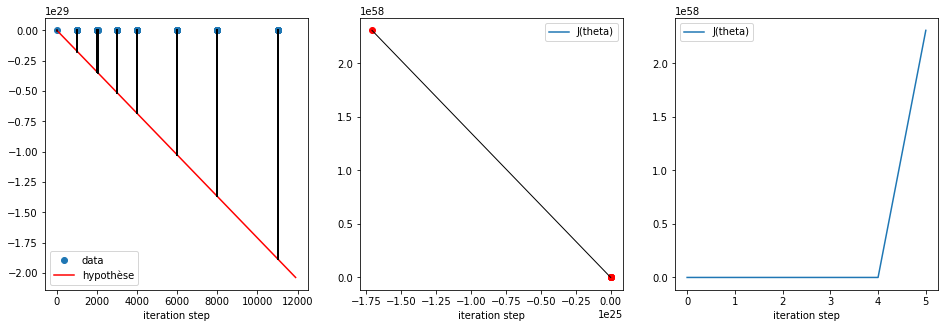

In [37]:
# On parametrise deux trois trucs

plt.rcParams['figure.figsize'] = [16, 5]
costFct = 0
count = 0
theta = thetaInit

# Et on se lance dans la boucle: La descente de gradient!
while np.abs(costFunction(data.y,yhat) - costFct)/costFct >= epsilon:
    count += 1
    costFct = costFunction(data.y,yhat)
    theta += gradDescent(data.x1,data.y,yhat,alpha)
    yhat = hypothesis(data.x1,theta)
    gradDescentEvol = gradDescentEvol.append(pd.DataFrame({'theta':theta,
                                                           'J':costFunction(data.y,yhat)},
                                                          index = np.arange(1)),
                                             ignore_index=True)
    fig, ax = plt.subplots(ncols=3)
    plotData(ax[0],data,theta,yhat,gradDescentEvol)
    plotCostFunction(ax[1],data,theta,gradDescentEvol,thetaInit)
    plotCostFunctionEvol(ax[2],gradDescentEvol)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)

# 6) Conclusion

In [ ]:
# Afficher les résultat:
print('La descente de gradient a été réalisé en %i étapes.' % count)
print('theta = %f' % theta)
print('J(theta) = %f' % costFunction(data.y,yhat))

In [ ]:
# Faisons une prédiction ....

newGPUs = [3072*1.5,11264*1.2]
for newGPU in newGPUs:
    print("Notre nouvelle carte de %i Mo de GPU pourra se vendre autour de %.2f €" % 
          (newGPU,newGPU*theta))
    
plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(data.x1,data.y,'o',label='data')
plt.plot(getHypothesisForPLot(theta).x,getHypothesisForPLot(theta).y,'r',label='hypothèse')
for i in range(data.shape[0]):
    plt.plot((data.x1[i],data.x1[i]), (min(data.y[i],yhat[i]),max(data.y[i],yhat[i])), 'k-')
plt.plot(newGPUs,[newGPU*theta for newGPU in newGPUs], 'or', label='predictions')
plt.xlabel('GPU (Mo)')
plt.ylabel('prix (€)')
plt.legend()
plt.show();

# 7) Choix du taux d'apprentissage lambda

In [ ]:
# On utilise donc une valeur de départ pour theta généré aléatoirement entre 0 et 1, 
#    la valeur du learning rate est fixé à 0.00000003
# Epsilon correspond à la précision que l'on veut atteindre pour stopper la descente de gradient

thetaInit = np.random.rand()
yhat1 = hypothesis(data.x1,thetaInit)
yhat2 = hypothesis(data.x1,thetaInit)
yhat3 = hypothesis(data.x1,thetaInit)
alpha1 = 0.000000001
alpha2 = 0.00000001
alpha3 = 0.00000006

epsilon = 0.001
# On prepare un dataframe pour stocker les valeurs de J(theta) et theta1

gradDescentEvol1 = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(data.y,yhat1)},index = np.arange(1))
gradDescentEvol2 = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(data.y,yhat2)},index = np.arange(1))
gradDescentEvol3 = pd.DataFrame({'theta':thetaInit,
                                'J':costFunction(data.y,yhat3)},index = np.arange(1))
# On parametrise deux trois trucs
plt.rcParams['figure.figsize'] = [16, 5]
count = 0
costFct1 = 0
theta1 = thetaInit
costFct2 = 0
theta2 = thetaInit
costFct3 = 0
theta3 = thetaInit

# Et on se lance dans la boucle: La descente de gradient!
while np.abs(costFunction(data.y,yhat2) - costFct2)/costFct2 >= epsilon:
    count += 1
    costFct1 = costFunction(data.y,yhat1)
    theta1 += gradDescent(data.x1,data.y,yhat1,alpha1)
    yhat1 = hypothesis(data.x1,theta1)
    gradDescentEvol1 = gradDescentEvol1.append(pd.DataFrame({'theta':theta1,
                                                               'J':costFunction(data.y,yhat1)},
                                                              index = np.arange(1)),
                                                         ignore_index=True)
    costFct2 = costFunction(data.y,yhat2)
    theta2 += gradDescent(data.x1,data.y,yhat2,alpha2)
    yhat2 = hypothesis(data.x1,theta2)
    gradDescentEvol2 = gradDescentEvol2.append(pd.DataFrame({'theta':theta2,
                                                               'J':costFunction(data.y,yhat2)},
                                                              index = np.arange(1)),
                                                         ignore_index=True)
    costFct3 = costFunction(data.y,yhat3)
    theta3 += gradDescent(data.x1,data.y,yhat3,alpha3)
    yhat3 = hypothesis(data.x1,theta3)
    gradDescentEvol3 = gradDescentEvol3.append(pd.DataFrame({'theta':theta3,
                                                               'J':costFunction(data.y,yhat3)},
                                                              index = np.arange(1)),
                                                         ignore_index=True)
    fig, ax = plt.subplots(ncols=3)
    plotCostFunctionEvol(ax[0],gradDescentEvol1,'small alpha')
    plotCostFunctionEvol(ax[1],gradDescentEvol2,'correct alpha')
    plotCostFunctionEvol(ax[2],gradDescentEvol3,'huge alpha')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1)